In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [2]:
#pip install yellowbrick

In [3]:
#read_file=pd.read_excel("C:\\Users\\ROHINI\\dat.csv.xlsx")

In [4]:
  
# Write the dataframe object
# into csv file
#read_file.to_csv ("C:\\Users\\ROHINI\\dat.csv.xlsx", index = None,header=True)

In [5]:
# read csv file and convert 
# into a dataframe object
#df = pd.DataFrame(pd.read_csv("C:\\Users\\ROHINI\\dat.csv.xlsx"))
df=pd.read_csv("C:\\Users\\HP\\Desktop\\Excel R data sets\\500 devo.csv")

In [6]:
df=df.rename(columns={'Release Date':'Release_Date'})
df=df.rename(columns={'Artist Name(s)':'Artist_Name'})


In [7]:
df.head(5)

,Unnamed: 0,Spotify ID,Artist IDs,Track Name,Album Name,Artist_Name,Release_Date,Duration (ms),Popularity,Added By,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,0,2lyh5kOAC98ZJikzYSZN8n,2ijWbN5KykTYiBoVmhzCTU,He Ram He Ram,Hey Gobind Hey Gopal,Jagjit Singh,1984-08-01,253000,41,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,...,0,-17.906,1,0.0264,0.717,0.00000,0.1910,0.697,91.560,4
1,1,0rqxKvWQMF2tlfBrrpxM0l,3ZFpN9rFHLxElJpqyABkMt,Govind Bolo Hari Gopal Bolo,Radhey Govind (Shree Krishna Bhajans),Kishore Manraja,2014-07-10,343745,41,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,...,3,-8.292,1,0.0609,0.760,0.00002,0.0473,0.496,84.439,4
2,2,7F8RNvTQlvbeBLeenycvN6,"1mYsTxnqsietFxj1OgoGbG,4W91bbPB2CTSsHwt7eqNl7,...",Kun Faya Kun,Rockstar,"A.R. Rahman,Javed Ali,Mohit Chauhan",2011-10-01,470500,70,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,...,1,-11.008,1,0.0329,0.679,0.00000,0.0910,0.575,87.549,4
3,3,5wPr9KuSfGBwGCi6NgJoVv,"1mYsTxnqsietFxj1OgoGbG,61JrslREXq98hurYL2hYoc,...",O Paalanhaare,Lagaan (Original Motion Picture Soundtrack),"A.R. Rahman,Lata Mangeshkar,Udit Narayan",2001-04-03,318946,51,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,...,2,-10.632,1,0.0423,0.895,0.00000,0.2940,0.176,81.846,4
4,4,5KCvFKy39WXTnsiOoIqEla,1dVygo6tRFXC8CSWURQJq2,Hanuman Chalisa,Haidakhandi - Aarti & Bhajans,Sonu Nigam,2016-04-13,483591,44,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,...,11,-12.584,0,0.0598,0.701,0.00000,0.1090,0.426,104.704,4


In [8]:
df.columns

Index(['Unnamed: 0', 'Spotify ID', 'Artist IDs', 'Track Name', 'Album Name',
       'Artist_Name', 'Release_Date', 'Duration (ms)', 'Popularity',
       'Added By', 'Added At', 'Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature'],
      dtype='object')

In [9]:
df['Release_Date']= pd.to_datetime(df['Release_Date']) # imp step # Release_Date column is object i.e. string 
#Now we will convert it to datetime format using pd.to_datetime() function

In [10]:
df['year']=df['Release_Date'].map(lambda x:x.strftime('%Y')) # important step # extracting only year and put into new column 
# which is year again we have to convert that year object to integer

In [11]:
df['year']=df['year'].astype(str).astype(int) # than convert object to integer

In [12]:
df=df.drop(['Release_Date'],axis=1)

In [13]:
#Convert Milli secs duration into minutes
df['duration_min'] = df['Duration (ms)']/60000
df['duration_min'] = df['duration_min'].round(2)

In [14]:
df.duplicated().any().sum()

0

In [15]:
df.duplicated().value_counts()

False    523
dtype: int64

In [16]:
df=df.drop(['Spotify ID'],axis=1)

In [17]:
df.duration_min.sum()/(24*365*60)

0.005832800608828006

In [18]:
df.head(15)

,Unnamed: 0,Artist IDs,Track Name,Album Name,Artist_Name,Duration (ms),Popularity,Added By,Added At,Genres,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,year,duration_min
0,0,2ijWbN5KykTYiBoVmhzCTU,He Ram He Ram,Hey Gobind Hey Gopal,Jagjit Singh,253000,41,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:01Z,"classic bollywood,desi pop,filmi,ghazal,sufi",...,1,0.0264,0.717,0.000000,0.1910,0.697,91.560,4,1984,4.22
1,1,3ZFpN9rFHLxElJpqyABkMt,Govind Bolo Hari Gopal Bolo,Radhey Govind (Shree Krishna Bhajans),Kishore Manraja,343745,41,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:09Z,"gujarati garba,mantra",...,1,0.0609,0.760,0.000020,0.0473,0.496,84.439,4,2014,5.73
2,2,"1mYsTxnqsietFxj1OgoGbG,4W91bbPB2CTSsHwt7eqNl7,...",Kun Faya Kun,Rockstar,"A.R. Rahman,Javed Ali,Mohit Chauhan",470500,70,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:16Z,"desi pop,filmi,modern bollywood,desi hip hop,sufi",...,1,0.0329,0.679,0.000000,0.0910,0.575,87.549,4,2011,7.84
3,3,"1mYsTxnqsietFxj1OgoGbG,61JrslREXq98hurYL2hYoc,...",O Paalanhaare,Lagaan (Original Motion Picture Soundtrack),"A.R. Rahman,Lata Mangeshkar,Udit Narayan",318946,51,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:26Z,"desi pop,filmi,modern bollywood,classic bollyw...",...,1,0.0423,0.895,0.000000,0.2940,0.176,81.846,4,2001,5.32
4,4,1dVygo6tRFXC8CSWURQJq2,Hanuman Chalisa,Haidakhandi - Aarti & Bhajans,Sonu Nigam,483591,44,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:37Z,"desi pop,filmi,modern bollywood",...,0,0.0598,0.701,0.000000,0.1090,0.426,104.704,4,2016,8.06
5,5,2NoJ7NuNs9nyj8Thoh1kbu,Bajrag Baan,Shree Hanuman,Hariharan,506330,31,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:40Z,"filmi,ghazal,tamil pop",...,1,0.0532,0.721,0.000000,0.3230,0.802,90.791,4,2001,8.44
6,6,7HCqGPJcQTyGJ2yqntbuyr,Namo Namo,Kedarnath,Amit Trivedi,322250,70,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:51Z,"desi pop,filmi,modern bollywood",...,1,0.0304,0.436,0.000000,0.1210,0.330,119.935,4,2018,5.37
7,7,"0L5GV6LN8SWWUWIdBbTLTZ,6wa1AsxB9oJP7lwNSmbcYx",Gurbani,Bhaag Milkha Bhaag (Original Motion Picture So...,"Shankar-Ehsaan-Loy,Daler Mehndi",100760,53,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:20:58Z,"desi pop,filmi,modern bollywood,bhangra,desi h...",...,1,0.0344,0.173,0.000451,0.1290,0.036,112.672,5,2013,1.68
8,8,4tNu5NPtqLbnG90ew6QUpb,Achutam Keshavam,Krishna,Vikram Hazra,348933,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:21:03Z,"bhajan,mantra",...,1,0.0406,0.180,0.000000,0.1460,0.640,92.438,4,2016,5.82
9,9,4xd7mLI7urqrxELaXhAvzw,Shekhar Ravjiani's Hanuman Chalisa,Shekhar Ravjiani's Hanuman Chalisa - Zee Music...,Shekhar Ravjiani,541675,50,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-21T09:21:07Z,"filmi,modern bollywood",...,1,0.0272,0.844,0.000000,0.0868,0.292,139.876,4,2014,9.03


In [19]:
# means this playlist will take this much of time 

In [20]:
#Drop the columns
df.drop(['Duration (ms)'],inplace=True,axis=1)

In [21]:
plt.rcParams.update({'font.size': 22})

<AxesSubplot:xlabel='Mode', ylabel='Density'>

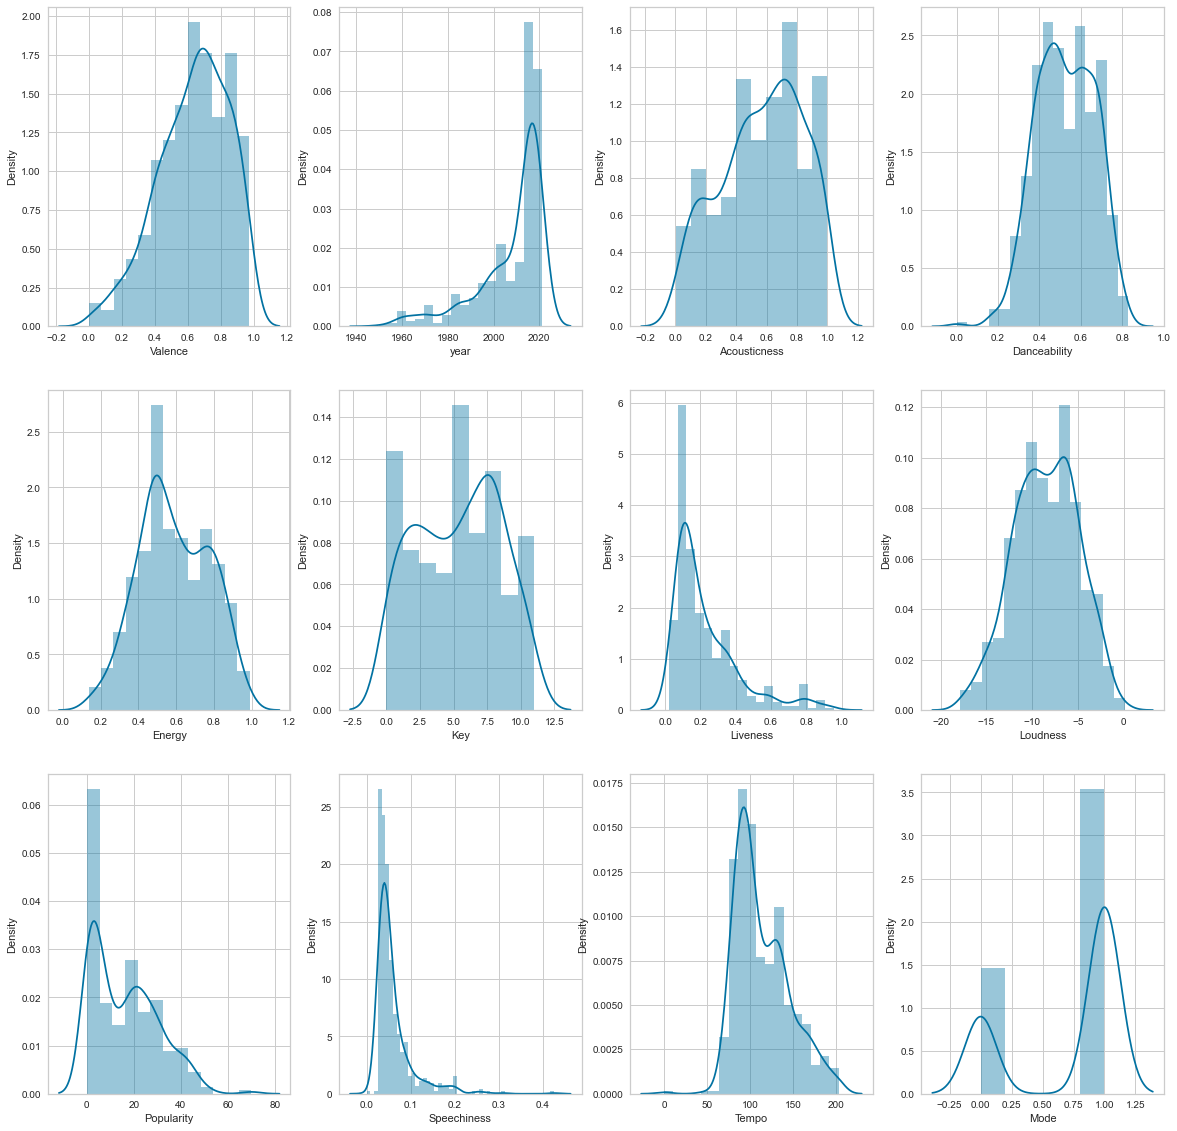

In [22]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['Valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['Acousticness'],ax=ax[0,2])
sns.distplot(df['Danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['Energy'],ax=ax[1,0])
sns.distplot(df['Key'],ax=ax[1,1])
sns.distplot(df['Liveness'],ax=ax[1,2])
sns.distplot(df['Loudness'],ax=ax[1,3])
sns.distplot(df['Popularity'],ax=ax[2,0])
sns.distplot(df['Speechiness'],ax=ax[2,1])
sns.distplot(df['Tempo'],ax=ax[2,2])
sns.distplot(df['Mode'],ax=ax[2,3])

<AxesSubplot:>

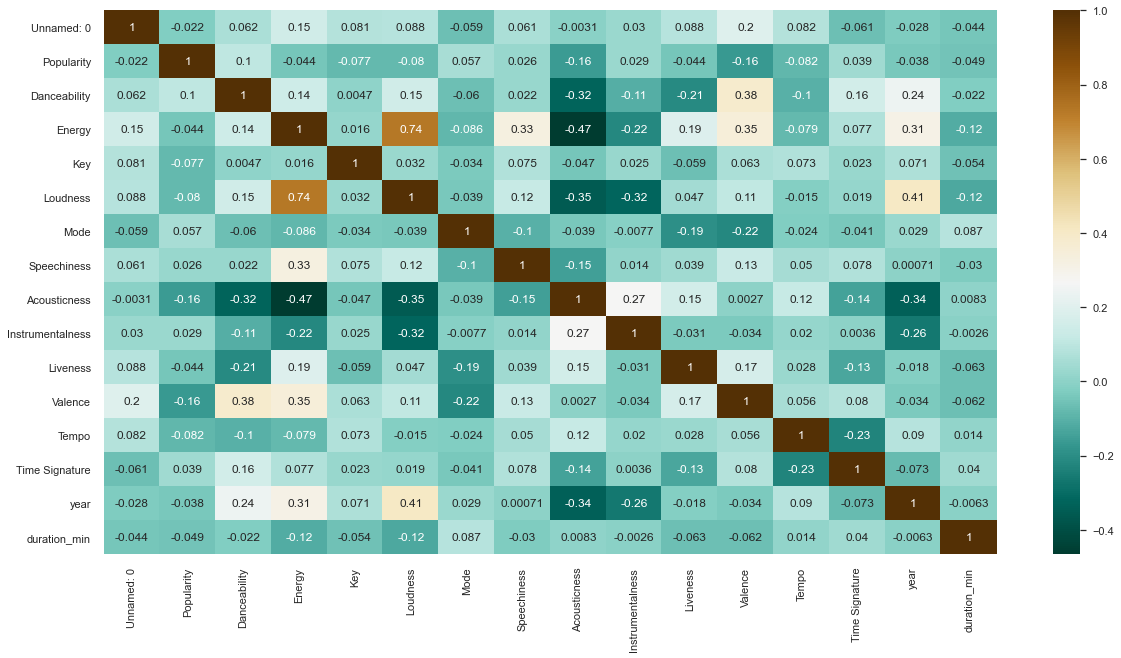

In [23]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

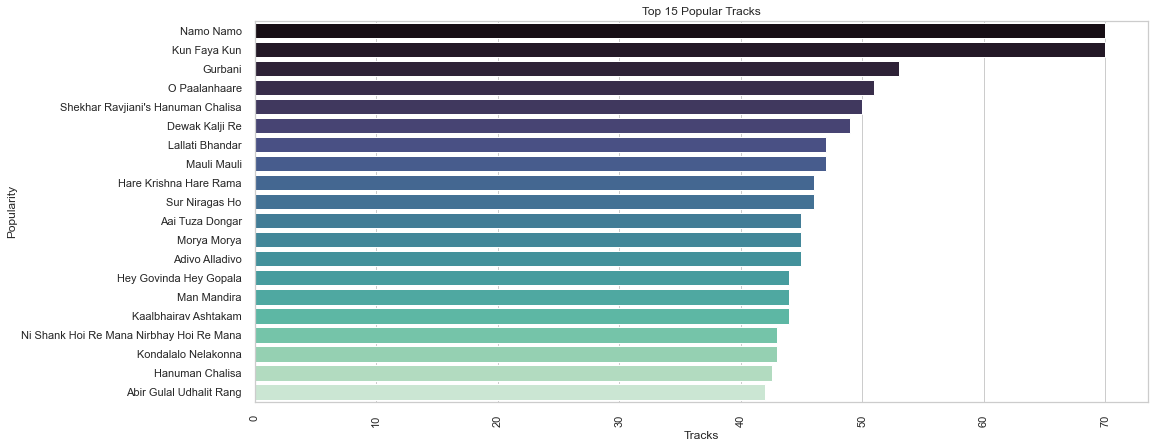

In [24]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby('Track Name')['Popularity'].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [25]:
df.groupby("Track Name")['Popularity'].mean().sort_values(ascending=False).head(20)

Track Name
Namo Namo                                   70.0
Kun Faya Kun                                70.0
Gurbani                                     53.0
O Paalanhaare                               51.0
Shekhar Ravjiani's Hanuman Chalisa          50.0
Dewak Kalji Re                              49.0
Lallati Bhandar                             47.0
Mauli Mauli                                 47.0
Hare Krishna Hare Rama                      46.0
Sur Niragas Ho                              46.0
Aai Tuza Dongar                             45.0
Morya Morya                                 45.0
Adivo Alladivo                              45.0
Hey Govinda Hey Gopala                      44.0
Man Mandira                                 44.0
Kaalbhairav Ashtakam                        44.0
Ni Shank Hoi Re Mana Nirbhay Hoi Re Mana    43.0
Kondalalo Nelakonna                         43.0
Hanuman Chalisa                             42.6
Abir Gulal Udhalit Rang                     42.0
Name: Pop

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

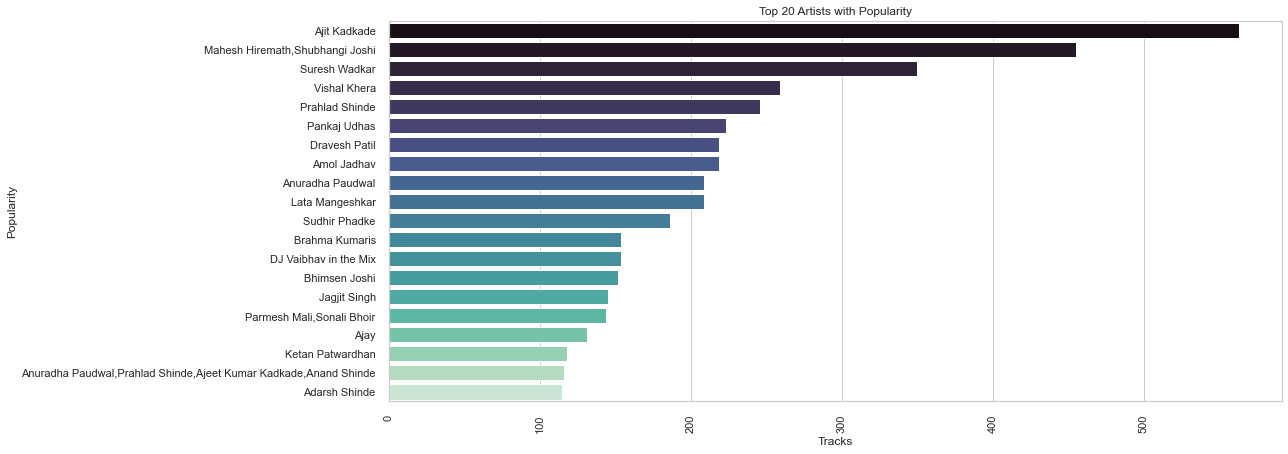

In [26]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("Artist_Name")['Popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [27]:
y=pd.DataFrame(df['Artist_Name'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y


,Artists,Songs_Count
0,Vishal Khera,36
1,Ajit Kadkade,32
2,Alka Yagnik,21
3,Lata Mangeshkar,21
4,"Mahesh Hiremath,Shubhangi Joshi",20


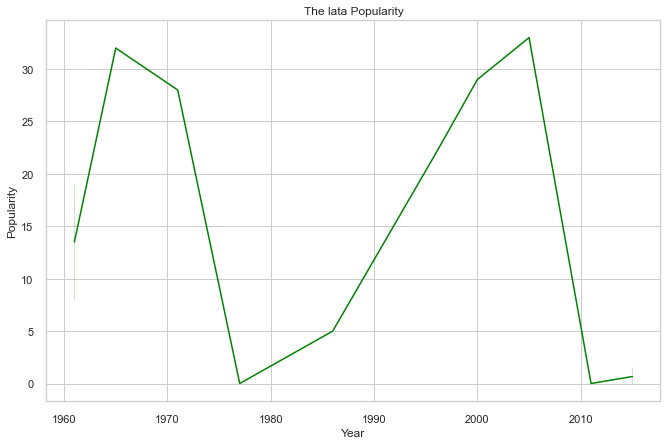

In [28]:
# visualize the popularity of The Lataji songs over the year
lata = df[df['Artist_Name'] == 'Lata Mangeshkar']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='Popularity', data=lata, color='green')
# Labels
plt.title("The lata Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

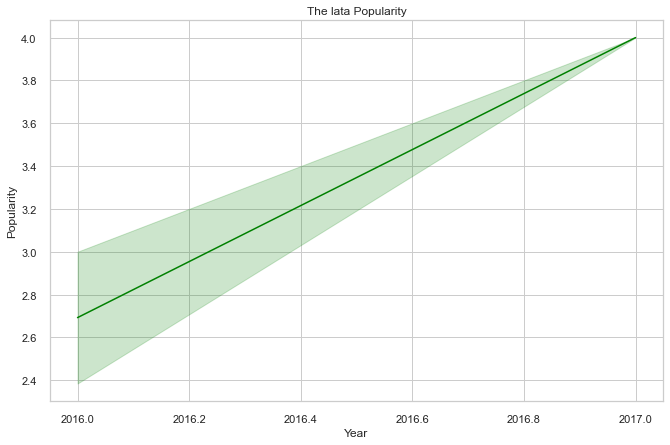

In [29]:
# visualize the popularity of The Lataji songs over the year
lata = df[df['Artist_Name'] == 'Alka Yagnik']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='Popularity', data=lata, color='green')
# Labels
plt.title("The lata Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [30]:
# no of song  released

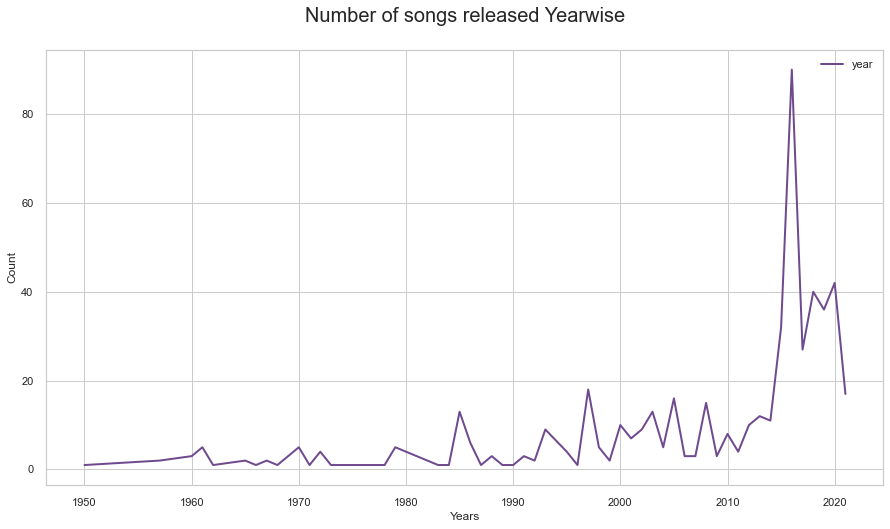

In [31]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [32]:
df.columns


Index(['Unnamed: 0', 'Artist IDs', 'Track Name', 'Album Name', 'Artist_Name',
       'Popularity', 'Added By', 'Added At', 'Genres', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature',
       'year', 'duration_min'],
      dtype='object')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(stop_words='english')

In [35]:
df['Artist_Name'] = df['Artist_Name'].fillna('')

In [36]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['Artist_Name'])

In [37]:
tfidf_matrix.shape

(523, 325)

In [38]:
from sklearn.metrics.pairwise import linear_kernel

In [39]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
#Construct a reverse map of indices and song titles
indices = pd.Series(df.index, index=df['Track Name']).drop_duplicates()

In [41]:
# Function that takes  song title as input and outputs most similar song
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all song with that song
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the song based on the similarity scores
    #sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar song
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar song
    return df['Track Name'].iloc[song_indices]

In [42]:
get_recommendations('Namo Namo')

1            Govind Bolo Hari Gopal Bolo
2                           Kun Faya Kun
3                          O Paalanhaare
4                        Hanuman Chalisa
5                            Bajrag Baan
6                              Namo Namo
7                                Gurbani
8                       Achutam Keshavam
9     Shekhar Ravjiani's Hanuman Chalisa
10      Ganpati Aarti - Amitabh Bachchan
Name: Track Name, dtype: object

In [43]:
get_recommendations('Maili Chadar')

1    Govind Bolo Hari Gopal Bolo
Name: Track Name, dtype: object

In [44]:
df['Track Name'].head(115)

0                      He Ram He Ram
1        Govind Bolo Hari Gopal Bolo
2                       Kun Faya Kun
3                      O Paalanhaare
4                    Hanuman Chalisa
                   ...              
110                   Gayatri Mantra
111    Jai Krishna Hare Jai Ram Hare
112             Humpe Itni Kripa Kar
113     Saraswati Shloka Ya Kundendu
114                     Maili Chadar
Name: Track Name, Length: 115, dtype: object

In [45]:
get_recommendations('Achutam Keshavam')

1            Govind Bolo Hari Gopal Bolo
2                           Kun Faya Kun
3                          O Paalanhaare
4                        Hanuman Chalisa
5                            Bajrag Baan
6                              Namo Namo
7                                Gurbani
8                       Achutam Keshavam
9     Shekhar Ravjiani's Hanuman Chalisa
10      Ganpati Aarti - Amitabh Bachchan
Name: Track Name, dtype: object

In [51]:
feature_names = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness','Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence','duration_min','Key','Mode','year']


In [46]:
df.columns

Index(['Unnamed: 0', 'Artist IDs', 'Track Name', 'Album Name', 'Artist_Name',
       'Popularity', 'Added By', 'Added At', 'Genres', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature',
       'year', 'duration_min'],
      dtype='object')

In [53]:
X, y = df[feature_names], df['Popularity']
features = np.array(feature_names)

In [54]:
visualizer = FeatureCorrelation(labels=features)

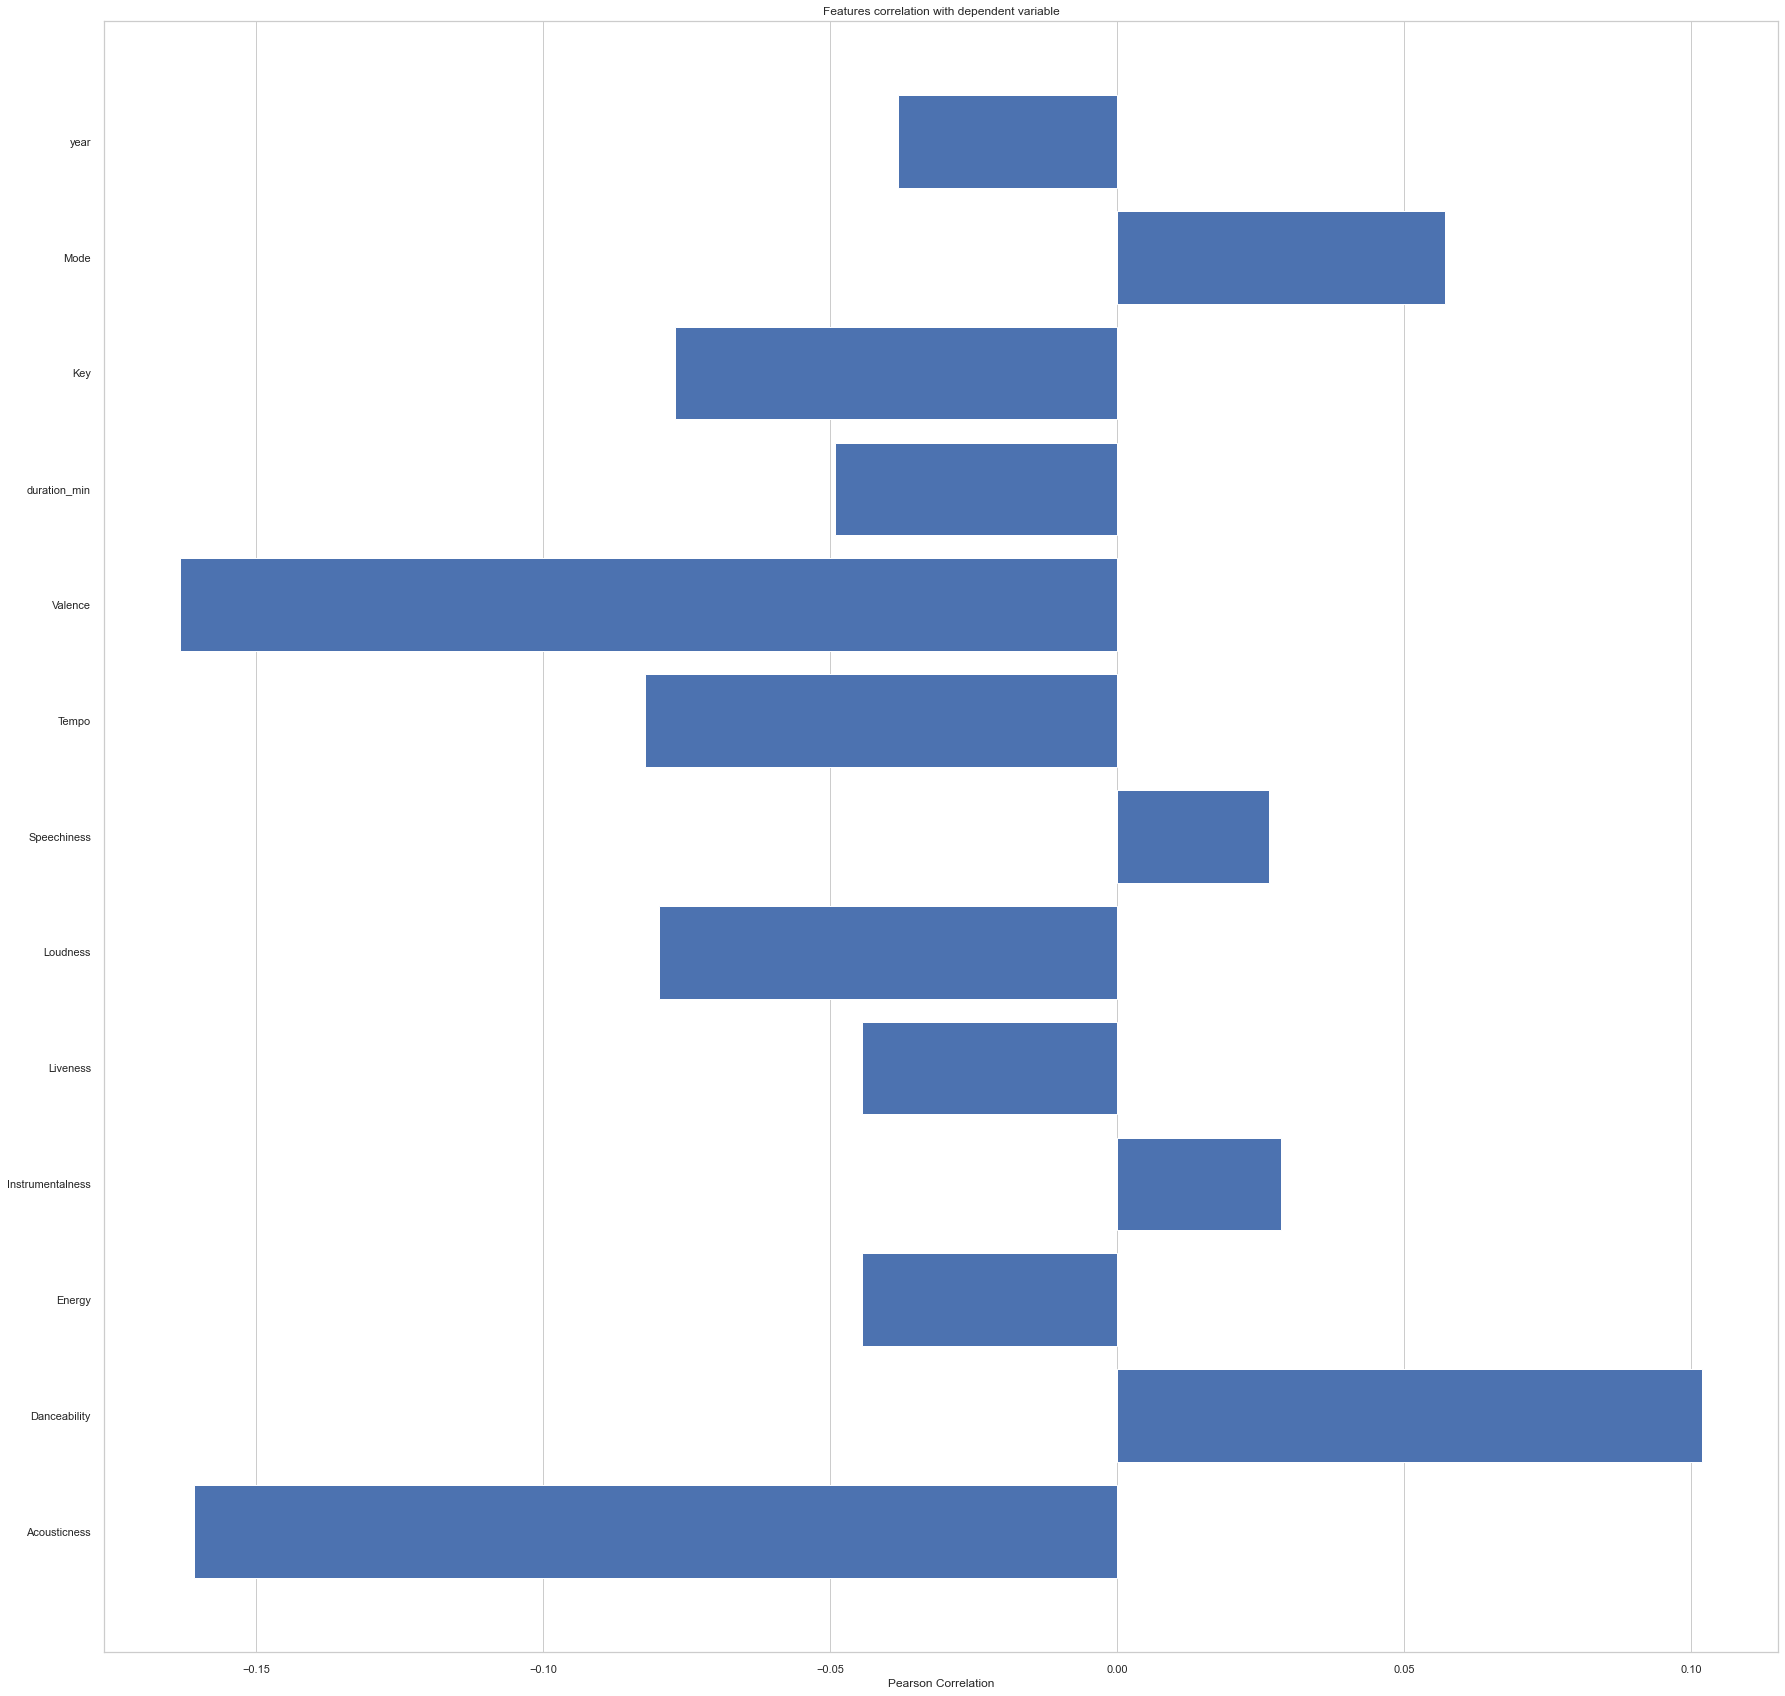

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [55]:
plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  